# Contents
1. [勾配法](#%E5%8B%BE%E9%85%8D%E6%B3%95)
    1. [1変数関数](#1%E5%A4%89%E6%95%B0%E9%96%A2%E6%95%B0)

# 勾配法（最急降下法、山登り法）
## 1変数関数
__Algorithm 3.1__  
gradientが最大になる方向へステップを刻む  
1. 勾配$\nabla f$を与える必要があるので微分できない関数には使えない
1. 最大値・最小値以外に極値が存在する場合、初期値によっては最大値・最小値以外の極値に到達する可能性がある
1. 極値が1つしかない場合でも、関数形によっては計算効率が悪くなる（勾配がなくなるので）

以下の関数の最大値をとるxを数値的に求める\*
$$
f(x) = -\left(x^2 +10 \sin (x)\right)
$$
最大値をとるxは大体1.3くらい。  
\*[scipy lecture note](http://www.turbare.net/transl/scipy-lecture-notes/intro/scipy.html)より

In [2]:
function sgn(x)::Float64
    if x < 0
        return -1.0
    elseif x==0
        return 0.0
    else
        return 1.0
    end
end

function search(x₀::Real, f::Function, f_diff::Function; h₀=1.0)
    # initialize
    x=x₀
    x_each = Array([[x]])
    h=sgn.(f_diff(x)).*abs(h₀)
    X1=x
    X2=x.+h
    
    if f(X1)<f(X2)
        while f(X1)<f(X2)
            h=2h
            X1=X2
            X2=X1.+h

            x=X1
            h=h./2.0
            append!(x_each, [[x]])
        end
    else
        while f(X1)>f(X2)
            h=h./2.0
            X2=X1.-h

            x=X2
            h=2 .* h
            append!(x_each, [[x]])
        end
    end
    
    return x, Array(transpose(hcat(x_each...)))
end

search (generic function with 1 method)

In [3]:
using PyPlot
using LinearAlgebra
using Printf

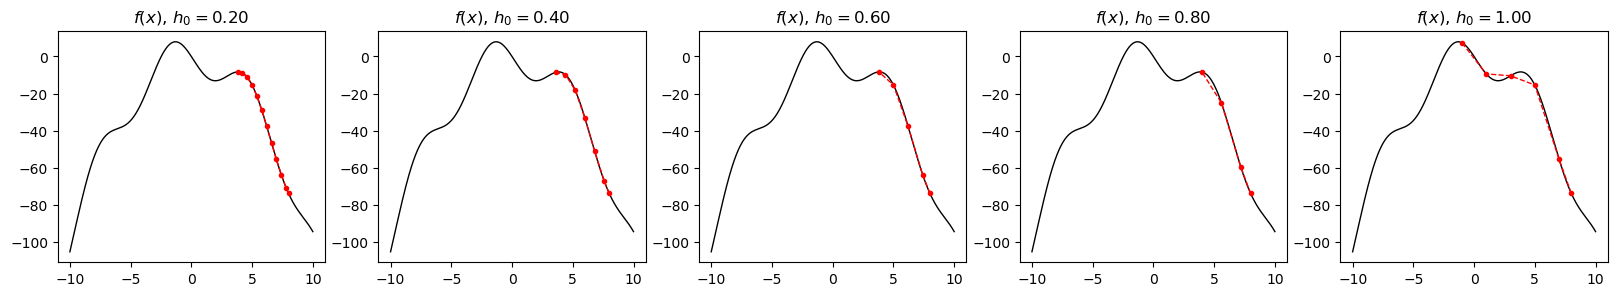

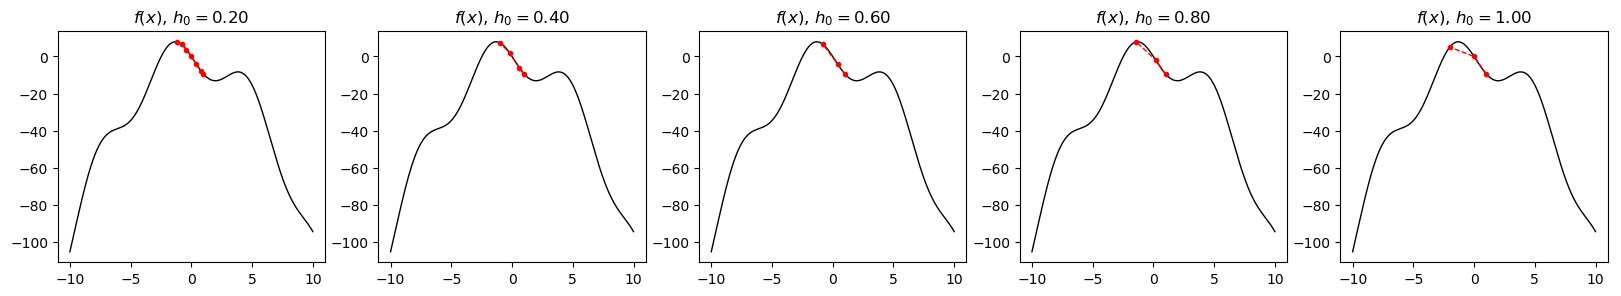

In [4]:
f(x)=-(x^2.0 + 10.0*sin(x))
f_diff(x)=-(2.0*x + 10.0*cos(x))
x=range(-10,stop=10,length=1000)

x₀=8.0
h₀_list=range(0.2,stop=1.0, length=5)
figsize = (20,3)
fig,axes=subplots(1,5,figsize=figsize)
for (i,h₀) in enumerate(h₀_list)
    x_estimated,x_steps=search(x₀, f, f_diff, h₀=h₀)
    ax=axes[i]
    ax[:set_title](L"$f(x)$, $h_0=$"* @sprintf("%2.2f",h₀))
    ax[:plot](x, f.(x), color="k", lw=1)
    ax[:plot](x_steps, f.(x_steps), color="r", lw=1, ls="--", marker="o", markersize=3)

end


x₀=1.0
h₀_list=range(0.2,stop=1.0, length=5)
figsize = (20,3)
fig,axes=subplots(1,5,figsize=figsize)
for (i,h₀) in enumerate(h₀_list)
    x_estimated,x_steps=search(x₀, f, f_diff, h₀=h₀)
    ax=axes[i]
    ax[:set_title](L"$f(x)$, $h_0=$"* @sprintf("%2.2f",h₀))
    ax[:plot](x, f.(x), color="k", lw=1)
    ax[:plot](x_steps, f.(x_steps), color="r", lw=1, ls="--", marker="o", markersize=3)
end

初期値の値によって異なる極値へ到達してしまうことがわかる。  
ステップサイズによっては局所解を超えて最大値付近へ到達できることもある（右上）。

## 多変数関数
__Algorithm 3.2__  
多変数関数でも基本的に1変数関数の場合と同様。  
$\nabla f$の方向の直線状で関数値が最大になる点まで進むことを繰り返す（直線探索）

6つこぶラクダの背関数\*の最小値を求める（つもりだった）。
$$
\begin{align}
f(x, y) &= (4 - 2.1x^2 + \frac{x^4}{3})x^2 + xy + (4y^2 - 4)y^2 \\
\nabla f &= \left(\begin{array}{c}
\frac{\partial f}{\partial x} \\
\frac{\partial f}{\partial y}
\end{array}\right)
= \left(\begin{array}{c}
8x-8.4x^3 + 2x^5+y \\
x+16y^3-8y
\end{array}\right)
\end{align}
$$
\*[scipy lecture note](http://www.turbare.net/transl/scipy-lecture-notes/intro/scipy.html)より

In [5]:
# 最大値を探しに行くアルゴリズムなので符号反転した
f(x,y) = ((4-2.1*x^2 + (x^4)/3)*x^2 + x*y + (4y^2-4)*y^2) .* (-1.0)
∇f(x,y) = [8x-8.4x^3+2x^5+y; x+16y^3-8y] .*(-1.0)

∇f (generic function with 1 method)

まずは関数をプロットして概観をつかむ。

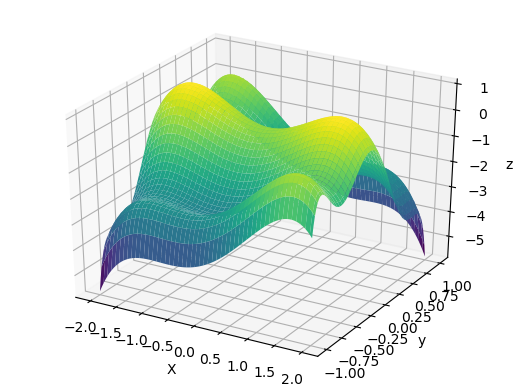

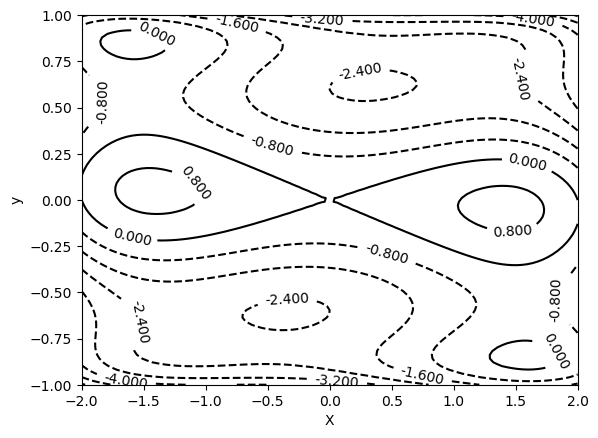

PyObject Text(24.0, 0.5, 'y')

In [6]:
xx=collect(range(-2,stop=2,length=100))
yy=collect(range(-1,stop=1,length=100))
z=zeros(length(xx),length(yy))

for (i,x) in enumerate(xx)
    for (j,y) in enumerate(yy)
        z[i,j]=f(x,y)
    end
end

figure()
surf(xx,yy,z, cmap="viridis")
ax=gca()
ax[:set_xlabel]("X")
ax[:set_ylabel]("y")
ax[:set_zlabel]("z")

figure()
_cp=contour(xx,yy,z, colors="k", lw=1, levels=10)
ax=gca()
ax[:clabel](_cp, inline=1, fontsize=10)
ax[:set_xlabel]("X")
ax[:set_ylabel]("y")


上記の関数は到底計算ができなかった。  
単峰の2次元ガウス関数を用いる。  
$$
\begin{align}
f(\boldsymbol{x}) &= \exp\left(-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^TΣ^{-1}(\boldsymbol{x}-\boldsymbol{\mu})\right) \\
\nabla f(\boldsymbol{x}) &= \exp\left(-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^TΣ^{-1}(\boldsymbol{x}-\boldsymbol{\mu})\right) \cdot \left(-Σ^{-1}(\boldsymbol{x}-\boldsymbol{\mu})\right) \\
\boldsymbol{\mu} &= \left(\begin{array}{c}
0 \\
0
\end{array}\right),\;\;
\Sigma=\Sigma^{-1}=\left(\begin{array}{cc}
1 & 0 \\
0 & 1
\end{array}\right)
\end{align}
$$



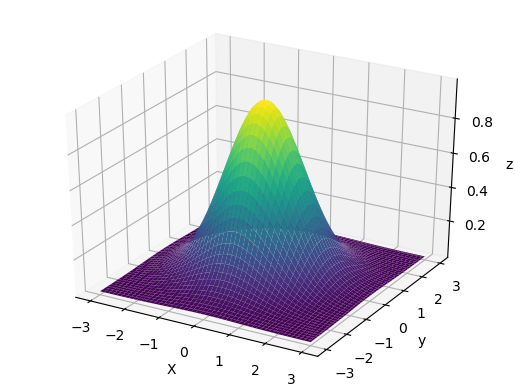

PyObject Text(0.09109821416582616, 0.012204846458825202, 'z')

In [7]:
μ=[0.0, 0.0]
Σ=[1.0 0.0; 0.0 1.0]
f(x)=exp(-(x-μ)'*Σ*(x-μ) * 0.5)
∇f(x)=exp(-(x-μ)'*Σ*(x-μ) * 0.5) * (-Σ*(x-μ))


xx=collect(range(-3,stop=3,length=100))
yy=collect(range(-3,stop=3,length=100))
z=zeros(length(xx),length(yy))

for (i,x) in enumerate(xx)
    for (j,y) in enumerate(yy)
        z[i,j]=f([x,y])
    end
end

figure()
surf(xx,yy,z, cmap="viridis")
ax=gca()
ax[:set_xlabel]("X")
ax[:set_ylabel]("y")
ax[:set_zlabel]("z")

__Algorithm 3.2__ 

In [8]:
function hill_climbing(x₀,t₀,δ,f,∇f;h₀=1.0)
    x=x₀
    x_steps=[x]
    t=t₀
    Δx=[Inf,Inf]
    while norm(Δx)>=δ
        F(t)=f(x.+t.*∇f(x))
        dFdt(t)=dot(∇f(x.+t.*∇f(x) ), ∇f(x))
        t_estimated,t_steps=search(t,F,dFdt,h₀=h₀)
        Δx=t_estimated.*∇f(x)
        x=x.+Δx
        append!(x_steps,[x])
        t=t_estimated
    end
    return x, Array(transpose(hcat(x_steps...)))
end

hill_climbing (generic function with 1 method)

In [11]:
x₀=[3.0, 2.0]   #[-3,3]より外に出ると計算時間が爆発（勾配消失？）
t₀=1.0
h₀=0.1
δ=1e-8

x,x_steps=hill_climbing(x₀,t₀,δ,f,∇f,h₀=h₀)

([-1.28439e-25, -8.56261e-26], [3.0 2.0; 0.000187778 0.000125186; 4.78196e-12 3.18798e-12; -1.28439e-25 -8.56261e-26])

単峰なので、勾配が最大になる方向に最大値が存在する。  
そのため、勾配法で簡単に解を求めることができた。  
一方、初期値を最大値から遠くにすると途端に計算が終わらなくなる。